In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# set the max columns to none
pd.set_option('display.max_columns', None)
# set the max rows to none
pd.set_option('display.max_rows', None)

In [3]:
orig_data = pd.read_excel('renewal.xlsx')

In [4]:
orig_data.columns

Index(['OpportunityID_ren', 'CreatedDate', 'FundedDate', 'OpportunityName',
       'Priordeal_OppID', 'Renewal_PreviousCollectionStatus',
       'Renewal_PreviousPace', 'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_PreviousCreditScore', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousHBwoLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_PreviousAvgDailyBalance',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements',
       'Last3Months_MA_OverdraftDays', 'Last3Months_MA_NumReturnItems',
       'Last3Months_Sum_NumReturnItems', 'LastBankStatement_OverdraftDays',
       'Last3Months_MA_AdjustedMonthlyDeposits',
       'Last3Months_MA_AvgDailyBalance', 'Credit_Score__c',
       'Time_in_Business__c', 'Is_this_Business_home_based__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c', 'HBwoLCF',
       'Contract_HoldBack__c', 'Last3Statments_MA_AdjustedMonthlyDeposits',
 

In [5]:
orig_data['OpportunityID'] = orig_data['OpportunityID_ren']
orig_data.drop('OpportunityID_ren',axis = 1,inplace = True)

In [6]:
orig_data.columns

Index(['CreatedDate', 'FundedDate', 'OpportunityName', 'Priordeal_OppID',
       'Renewal_PreviousCollectionStatus', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Last3Months_MA_OverdraftDays',
       'Last3Months_MA_NumReturnItems', 'Last3Months_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays',
       'Last3Months_MA_AdjustedMonthlyDeposits',
       'Last3Months_MA_AvgDailyBalance', 'Credit_Score__c',
       'Time_in_Business__c', 'Is_this_Business_home_based__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c', 'HBwoLCF',
       'Contract_HoldBack__c', 'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments

In [7]:
orig_data.corr()['WriteOff_YN'].sort_values()

NumberOfBankStatements                      -0.347749
Time_in_Business__c                         -0.110717
Renewal_PreviousPaidPercentageOfRTR         -0.094931
Renewal_CountPreviousDeals                  -0.088926
Credit_Score__c                             -0.058623
Renewal_PreviousCreditScore                 -0.054041
Contract_HoldBack__c                        -0.042952
PctAvgDailybalance2AvgMonthlyDeposits       -0.039979
NewDeal_YN                                  -0.032445
Last3Months_Sum_NumReturnItems              -0.030820
HB_with_LCF_Payment__c                      -0.019800
Renewal_PreviousHBwLCF                      -0.015524
HBwoLCF                                     -0.012760
Renewal_PreviousHBwoLCF                     -0.011872
Last3Months_MA_NumReturnItems               -0.011795
TwoMonthAvg_AdjustedMonthlyDeposits         -0.009154
Last3Statments_Sum_NumReturnItems           -0.007732
Last3Statments_MA_NumReturnItems            -0.006262
Renewal_PreviousPosition    

In [8]:
round(100*orig_data.isna().sum()/len(orig_data),2).sort_values()

CreatedDate                                   0.00
BBC_Position__c                               0.00
Drop_category                                 0.00
Contract_HoldBack__c                          0.00
Last3Statments_MA_OverdraftDays               0.00
Last3Statments_MA_NumReturnItems              0.00
Last3Statments_Sum_NumReturnItems             0.00
FundedAmount                                  0.00
Paybackamount                                 0.00
NewDeal_YN                                    0.00
ActiveDeal_YN                                 0.00
WriteOff_YN                                   0.00
FundedWriteOffAmount_Gross                    0.00
WOGross_AdvanceBalance                        0.00
Industry                                      0.00
Industry_Group__c                             0.00
Is_this_Business_home_based__c                0.00
Time_in_Business__c                           0.00
HB_with_LCF_Payment__c                        0.00
Renewal_PreviousCountBounces   

# Decile Analysis Function

In [76]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['Rank']=data[prob].rank(method="first",ascending=True)
    data["Decile"]=np.floor(1+(10*(data["Rank"]-1))/len(data["Rank"])).astype(int)
    
    grouped = data.groupby('Decile', as_index = False)
    kstable = pd.DataFrame()
    kstable['No_of_Opps'] = grouped.count()[prob]
    kstable['min_prob'] = round(100*grouped.min()[prob],2)
    kstable['max_prob'] = round(100*grouped.max()[prob],2)
    kstable['Avg_score']=round((kstable['min_prob']+kstable['max_prob'])/2,2)
    kstable['No_of_WOs']   = grouped.sum()[target]
    #kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=True).reset_index(drop = True)
    kstable['%_Unit_WO_Rate']=round(100*(kstable['No_of_WOs']/kstable['No_of_Opps']),2)
    kstable['cum_Unit_WO']=round(100*(kstable['%_Unit_WO_Rate']/sum(kstable['%_Unit_WO_Rate'])).cumsum(),2)
    #kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    #kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['Funded_$']=grouped.sum()['FundedAmount']
    kstable['%_Funded_$']=round(100*(kstable['Funded_$']/sum(kstable['Funded_$'])),2)
    kstable['Funded_WO_Gross_$']=grouped.sum()['FundedWriteOffAmount_Gross']
    kstable['Gross_$_rate']=round(100*(kstable['Funded_WO_Gross_$']/kstable['Funded_$']),2)
    kstable['Cum_Gross_WO_$']=round(100*(kstable['Funded_WO_Gross_$']/sum(kstable['Funded_WO_Gross_$'])).cumsum(),2)
    
    kstable['WO_Gross_Advance_Balance']=grouped.sum()['WOGross_AdvanceBalance']
    kstable['PaybackAmount_$']=grouped.sum()['Paybackamount']
    kstable['Gross_Advance_Rate']=round(100*(kstable['WO_Gross_Advance_Balance']/kstable['PaybackAmount_$']),2)
   # kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    #kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    #kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
   # kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
   # kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 15)
    return pd.DataFrame(kstable)

In [10]:
def ksp(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['Rank']=data[prob].rank(method="first",ascending=True)
    data["Decile"]=np.floor(1+(5*(data["Rank"]-1))/len(data["Rank"])).astype(int)
    
    grouped = data.groupby('Decile', as_index = False)
    kstable = pd.DataFrame()
    kstable['No_of_Opps'] = grouped.count()[prob]
    kstable['min_prob'] = round(100*grouped.min()[prob],2)
    kstable['max_prob'] = round(100*grouped.max()[prob],2)
    kstable['Avg_score']=round((kstable['min_prob']+kstable['max_prob'])/2,2)
    kstable['No_of_WOs']   = grouped.sum()[target]
    #kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=True).reset_index(drop = True)
    kstable['%_Unit_WO_Rate']=round(100*(kstable['No_of_WOs']/kstable['No_of_Opps']),2)
    kstable['cum_Unit_WO']=round(100*(kstable['%_Unit_WO_Rate']/sum(kstable['%_Unit_WO_Rate'])).cumsum(),2)
    #kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    #kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['Funded_$']=grouped.sum()['FundedAmount']
    kstable['%_Funded_$']=round(100*(kstable['Funded_$']/sum(kstable['Funded_$'])),2)
    kstable['Funded_WO_Gross_$']=grouped.sum()['FundedWriteOffAmount_Gross']
    kstable['Gross_$_rate']=round(100*(kstable['Funded_WO_Gross_$']/kstable['Funded_$']),2)
    kstable['Cum_Gross_WO_$']=round(100*(kstable['Funded_WO_Gross_$']/sum(kstable['Funded_WO_Gross_$'])).cumsum(),2)
    
    kstable['WO_Gross_Advance_Balance']=grouped.sum()['WOGross_AdvanceBalance']
    kstable['PaybackAmount_$']=grouped.sum()['Paybackamount']
    kstable['Gross_Advance_Rate']=round(100*(kstable['WO_Gross_Advance_Balance']/kstable['PaybackAmount_$']),2)
   # kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    #kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    #kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
   # kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
   # kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 15)
    return pd.DataFrame(kstable)

In [11]:
train_data=orig_data[(orig_data['FundedDate']<'2022-03-01') ]
val_data=orig_data[orig_data["FundedDate"]>='2022-03-01']
print(train_data.shape,val_data.shape)

(3386, 55) (582, 55)


In [12]:
data = train_data.copy()

In [13]:
data['Drop_category'].value_counts()

Negative        1865
Positive        1506
Neutral/Null      15
Name: Drop_category, dtype: int64

In [14]:
data['Industry'].value_counts()

Services                             1487
Transportation & Public Utilities     668
Construction                          451
Retail                                374
Finance, Insurance, Real Estate       125
Manufacturing                         112
Agriculture, Forestry, Fishing         78
Wholesale                              54
Wholesale Trade                        20
E-Commerce                             12
Mining                                  5
Name: Industry, dtype: int64

In [15]:
# data['Industry_Group']=np.where( 
#             (data['Industry']=="Services") | (data['Industry']=="Retail"), "Service_Retail",
#             np.where((data['Industry']=="Construction") | (data['Industry']=="Transportation & Public Utilities"),"Transport_Construction", "Other"))

In [16]:
data['Industry_Group']=np.where( 
            (data['Industry']=="Manufacturing") | (data['Industry']=="Agriculture, Forestry, Fishing")
            | (data['Industry']=="Wholesale") | (data['Industry']=="Wholesale Trade") |
            (data['Industry']=="E-Commerce") | (data['Industry'] == 'Mining'),'All_Other',data['Industry'])

In [17]:
data['Industry_Group'].value_counts()

Services                             1487
Transportation & Public Utilities     668
Construction                          451
Retail                                374
All_Other                             281
Finance, Insurance, Real Estate       125
Name: Industry_Group, dtype: int64

In [18]:
data['Industry_Group']

0                                Services
1         Finance, Insurance, Real Estate
2       Transportation & Public Utilities
3                                Services
4                                Services
5                               All_Other
6                            Construction
8                                Services
10                               Services
11                               Services
13      Transportation & Public Utilities
14                                 Retail
15                                 Retail
16                               Services
17                               Services
19      Transportation & Public Utilities
20      Transportation & Public Utilities
21                               Services
22                           Construction
23      Transportation & Public Utilities
24                              All_Other
25                               Services
26        Finance, Insurance, Real Estate
27      Transportation & Public Ut

In [19]:
# data.drop('Industry',axis = 1,inplace = True)

In [20]:
data['Industry_Group__c'].value_counts()

42 - Motor Freight Transportation and Warehousing                                           430
90 - Restaurants & Bars                                                                     267
15 - Building Construction General Contractors and Operative Builders                       265
75 - Automotive Repair, Services, and Parking                                               249
47 - Transportation Services                                                                198
87 - Engineering, Accounting, Research, Management, and Related Services                    188
73 - Business Services                                                                      182
17 - Construction Special Trade Contractors                                                 181
80 - Health Services                                                                        154
72 - Personal Services                                                                      152
59 - Miscellaneous Retail               

In [21]:
data.drop('Industry_Group__c',axis = 1,inplace = True)

In [22]:
data.columns

Index(['CreatedDate', 'FundedDate', 'OpportunityName', 'Priordeal_OppID',
       'Renewal_PreviousCollectionStatus', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Last3Months_MA_OverdraftDays',
       'Last3Months_MA_NumReturnItems', 'Last3Months_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays',
       'Last3Months_MA_AdjustedMonthlyDeposits',
       'Last3Months_MA_AvgDailyBalance', 'Credit_Score__c',
       'Time_in_Business__c', 'Is_this_Business_home_based__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c', 'HBwoLCF',
       'Contract_HoldBack__c', 'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments

## One Hot Encoding

In [23]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 47 

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Last3Months_MA_OverdraftDays',
       'Last3Months_MA_NumReturnItems', 'Last3Months_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays',
       'Last3Months_MA_AdjustedMonthlyDeposits',
       'Last3Months_MA_AvgDailyBalance', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'HBwoLCF', 'Contract_HoldBack__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_Ove

In [24]:
data.drop(columns = ['OpportunityName',
                    'Priordeal_OppID',
                    'Renewal_PreviousCollectionStatus'],axis = 'columns',inplace = True)

In [25]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 47 

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Last3Months_MA_OverdraftDays',
       'Last3Months_MA_NumReturnItems', 'Last3Months_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays',
       'Last3Months_MA_AdjustedMonthlyDeposits',
       'Last3Months_MA_AvgDailyBalance', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'HBwoLCF', 'Contract_HoldBack__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_Ove

In [26]:
data['Drop_category'].value_counts()

Negative        1865
Positive        1506
Neutral/Null      15
Name: Drop_category, dtype: int64

In [29]:
# data = pd.get_dummies(data, columns = ['Is_this_Business_home_based__c',
#                                        'Industry_Group',
#                                         'Drop_category'
#                                       ],drop_first=True)
# data.head()

In [30]:
data.head()

,CreatedDate,FundedDate,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,NumberOfBankStatements,Last3Months_MA_OverdraftDays,Last3Months_MA_NumReturnItems,Last3Months_Sum_NumReturnItems,LastBankStatement_OverdraftDays,Last3Months_MA_AdjustedMonthlyDeposits,Last3Months_MA_AvgDailyBalance,Credit_Score__c,Time_in_Business__c,BBC_Position__c,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,Last3Statments_MA_AdjustedMonthlyDeposits,Last3Statments_MA_AvgDailyBalance,Last3Statments_MA_ReturnItemDays,Last3Statments_MA_OverdraftDays,Last3Statments_MA_NumReturnItems,Last3Statments_Sum_NumReturnItems,FundedAmount,Paybackamount,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,WOGross_AdvanceBalance,NetWO,Industry,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,TwoMonthAvg_AdjustedMonthlyDeposits,AdjustedMonthlyDeposits,drop_percent,OpportunityID,Is_this_Business_home_based__c_Yes,Industry_Group_Construction,"Industry_Group_Finance, Insurance, Real Estate",Industry_Group_Retail,Industry_Group_Services,Industry_Group_Transportation & Public Utilities,Drop_category_Neutral/Null,Drop_category_Positive
0,2022-01-10 17:42:32,2022-01-11,100.00,0.74,689.0,6.0,0.0,2.0,0.00,NaN,33352.56,23557.68,0.0,3.0,4.666666,0.000000,0.0,8.0,38032.296666,6648.003333,706.0,6.54,2.0,16.45,NaN,16.0,38032.296666,6648.003333,0.0,4.666666,0.000000,0.0,15000.0,22350.0,0.0,0.0,0.0,0.0,0.0,NaN,Services,0.0,0.0,0.123046,0.174799,35799.237777,32815.22,-8.335428,0062M00000o8ivqQAA,0,0,0,0,1,0,0,0
1,2019-09-23 13:50:27,2019-09-30,100.00,0.90,547.0,1.0,0.0,2.0,0.00,NaN,22002.45,6128.15,0.0,3.0,0.000000,0.000000,0.0,NaN,23259.000000,3242.666666,553.0,3.73,1.0,55.07,26.0,29.0,23259.000000,3242.666666,0.0,0.000000,0.000000,0.0,16000.0,23840.0,0.0,0.0,1.0,5754.0,13594.0,0.0,"Finance, Insurance, Real Estate",0.0,0.0,0.054024,0.139416,19263.500000,31250.00,62.223894,0062M00000hmHKAQA2,1,0,1,0,0,0,0,1
2,2020-07-20 17:12:35,2020-07-27,82.87,0.88,559.0,1.0,4.0,2.0,33.46,17.0,19776.33,5128.67,0.0,3.0,0.000000,0.000000,0.0,0.0,33715.000000,2455.723333,573.0,2.20,1.0,8.35,0.0,12.0,33715.000000,2455.723333,0.0,0.000000,0.000000,0.0,9000.0,13410.0,0.0,0.0,0.0,0.0,0.0,NaN,Transportation & Public Utilities,0.0,0.0,0.413426,0.072838,44199.206153,34087.00,-22.878714,0062M00000kxeWLQAY,1,0,0,0,0,1,0,0
3,2021-08-05 13:37:09,2021-08-10,20.00,0.05,616.0,1.0,3.0,1.0,15.51,0.0,54605.21,46763.01,0.0,3.0,0.000000,0.000000,0.0,0.0,26059.850000,60912.113333,616.0,1.29,1.0,14.95,NaN,15.0,26059.850000,60912.113333,0.0,0.000000,0.000000,0.0,5000.0,7450.0,1.0,0.0,1.0,3510.0,5960.0,0.0,Services,0.0,NaN,-1.095377,2.337393,40417.822000,5474.06,-86.456316,0062M00000mTGVnQAO,0,0,0,0,1,0,0,0
4,2019-08-20 18:17:46,2019-08-21,100.00,0.89,594.0,2.0,3.0,5.0,0.00,NaN,97902.00,9762.70,0.0,3.0,2.000000,0.333333,1.0,NaN,109151.216666,7273.560000,594.0,14.05,5.0,47.75,42.0,12.0,109151.216666,7273.560000,2.0,2.000000,0.333333,1.0,10000.0,14900.0,0.0,0.0,0.0,0.0,0.0,NaN,Services,2.0,2.0,0.103061,0.066637,98051.325000,131351.00,33.961478,0062M00000gb1LRQAY,0,0,0,0,1,0,0,1


In [31]:
# check for %_skewness
print("Percenatge of Non_writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[0]/len(data['WriteOff_YN'])*100), "%")
print("Percenatge of writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[1]/len(data['WriteOff_YN'])*100), "%")

Percenatge of Non_writeoff_deal:  73 %
Percenatge of writeoff_deal:  27 %


## Correlation check

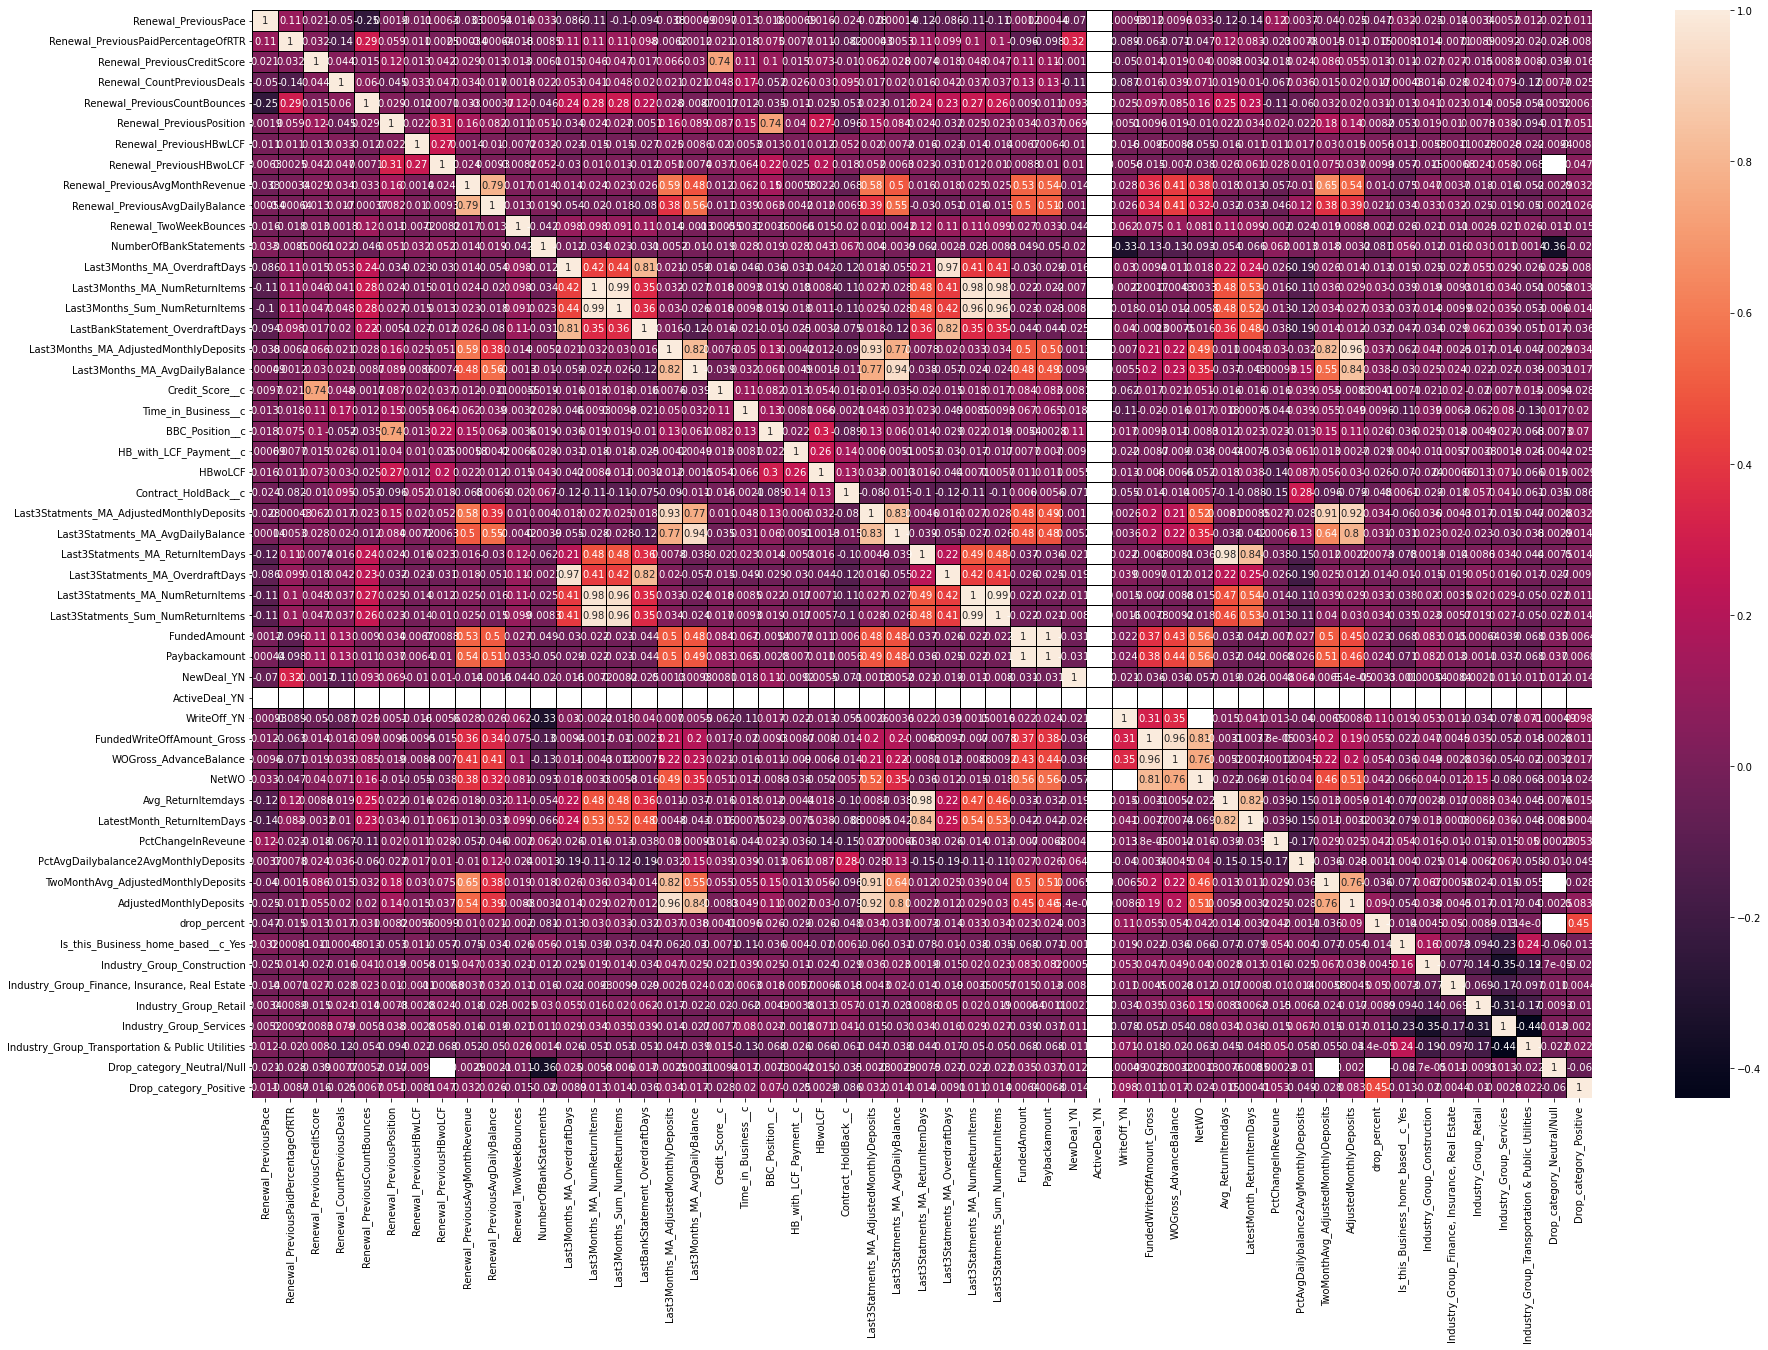

In [32]:
# Correlation between independent variables
f, ax = plt.subplots(figsize=(30,20))

corr = data.corr()
sns.heatmap(corr,ax=ax,annot=True,linewidths=1 ,linecolor= 'black')
plt.show()

In [33]:
corr

,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,NumberOfBankStatements,Last3Months_MA_OverdraftDays,Last3Months_MA_NumReturnItems,Last3Months_Sum_NumReturnItems,LastBankStatement_OverdraftDays,Last3Months_MA_AdjustedMonthlyDeposits,Last3Months_MA_AvgDailyBalance,Credit_Score__c,Time_in_Business__c,BBC_Position__c,HB_with_LCF_Payment__c,HBwoLCF,Contract_HoldBack__c,Last3Statments_MA_AdjustedMonthlyDeposits,Last3Statments_MA_AvgDailyBalance,Last3Statments_MA_ReturnItemDays,Last3Statments_MA_OverdraftDays,Last3Statments_MA_NumReturnItems,Last3Statments_Sum_NumReturnItems,FundedAmount,Paybackamount,NewDeal_YN,ActiveDeal_YN,WriteOff_YN,FundedWriteOffAmount_Gross,WOGross_AdvanceBalance,NetWO,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,TwoMonthAvg_AdjustedMonthlyDeposits,AdjustedMonthlyDeposits,drop_percent,Is_this_Business_home_based__c_Yes,Industry_Group_Construction,"Industry_Group_Finance, Insurance, Real Estate",Industry_Group_Retail,Industry_Group_Services,Industry_Group_Transportation & Public Utilities,Drop_category_Neutral/Null,Drop_category_Positive
Renewal_PreviousPace,1.000000,0.109099,0.020622,-0.050430,-0.249270,0.001857,-0.010940,0.006316,-0.033057,0.000537,-0.015974,0.033060,-0.086434,-0.109110,-0.103702,-0.093952,-0.037779,0.000491,0.009684,0.013307,0.017571,0.000690,0.015791,-0.023772,-0.028400,0.000136,-0.120441,-0.085690,-0.108239,-0.107135,0.001191,0.000436,-0.070036,NaN,-0.000925,0.011890,0.009622,0.033176,-0.122476,-0.142187,0.120227,0.003676,-0.039596,-0.024581,-0.046508,0.032030,-0.024969,-0.014435,0.003351,0.005171,0.011964,-0.020685,0.011336
Renewal_PreviousPaidPercentageOfRTR,0.109099,1.000000,0.031719,-0.144859,0.286428,0.058669,0.011044,0.002515,0.000336,-0.000637,-0.017547,-0.008546,0.109873,0.111951,0.114833,0.097545,-0.006229,0.001200,0.021486,0.018225,0.075239,0.007730,0.010932,-0.081994,-0.000431,0.005350,0.109923,0.098924,0.103589,0.100849,-0.095711,-0.097671,0.324565,NaN,-0.089403,-0.062973,-0.071153,-0.047237,0.118736,0.083332,-0.022790,0.007840,-0.001482,-0.010567,-0.015105,0.000815,0.013797,-0.007140,0.008866,0.009243,-0.019875,-0.027974,-0.008715
Renewal_PreviousCreditScore,0.020622,0.031719,1.000000,0.044351,0.015191,0.121576,0.013155,0.041854,0.028930,0.013055,0.013335,-0.006092,0.015309,0.045546,0.046965,0.016839,0.066347,0.029907,0.738455,0.111875,0.103920,0.015440,0.073037,-0.010399,0.062134,0.028040,0.007386,0.018123,0.047746,0.047368,0.109890,0.109519,-0.001696,NaN,-0.050122,0.013768,0.018539,0.040282,0.008787,-0.003194,-0.017973,0.024140,0.086140,0.054615,0.012636,-0.010603,-0.026861,0.026606,-0.014759,0.008339,0.007988,-0.038867,-0.015811
Renewal_CountPreviousDeals,-0.050430,-0.144859,0.044351,1.000000,0.060022,-0.044959,0.033018,0.047042,0.033643,0.016969,0.001785,0.022213,0.052844,0.041139,0.047510,0.019836,0.020900,0.020674,0.047621,0.171374,-0.052047,0.026026,0.030292,0.094982,0.017305,0.019857,0.015847,0.042237,0.037091,0.037435,0.127753,0.130658,-0.105192,NaN,-0.086562,0.016302,0.039041,0.071082,0.019221,0.009954,-0.066519,0.036234,0.014546,0.020049,0.017378,-0.000481,-0.015783,-0.028103,0.024488,0.079328,-0.117853,0.007685,-0.025057
Renewal_PreviousCountBounces,-0.249270,0.286428,0.015191,0.060022,1.000000,0.028609,-0.012469,0.007066,0.033267,-0.000367,0.118688,-0.046281,0.240645,0.277782,0.275702,0.222723,0.027877,-0.008690,-0.001718,0.011660,-0.035406,-0.011205,-0.024874,-0.053045,0.023396,-0.011833,0.243399,0.234648,0.265273,0.262663,0.009028,0.011199,0.092715,NaN,0.025483,0.096806,0.084944,0.164110,0.252809,0.230036,-0.105602,-0.059726,0.032498,0.019868,0.031347,-0.012809,0.041444,0.022870,0.014278,-0.005300,-0.054177,0.005186,0.006690
Renewal_PreviousPosition,0.00185

In [1351]:
# corr.to_excel('Correlation_Renewal.xlsx')

In [34]:
def correlation(df,threshold):
    cor_cor=set()
    cor_matrix=df.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs((cor_matrix.iloc[i,j]))>threshold:
                colname=cor_matrix.columns[i]
                cor_cor.add(colname)
    return cor_cor,len(cor_cor)

In [35]:
correlation(data,0.7)

({'AdjustedMonthlyDeposits',
  'Avg_ReturnItemdays',
  'BBC_Position__c',
  'Credit_Score__c',
  'Last3Months_MA_AvgDailyBalance',
  'Last3Months_Sum_NumReturnItems',
  'Last3Statments_MA_AdjustedMonthlyDeposits',
  'Last3Statments_MA_AvgDailyBalance',
  'Last3Statments_MA_NumReturnItems',
  'Last3Statments_MA_OverdraftDays',
  'Last3Statments_Sum_NumReturnItems',
  'LastBankStatement_OverdraftDays',
  'LatestMonth_ReturnItemDays',
  'NetWO',
  'Paybackamount',
  'Renewal_PreviousAvgDailyBalance',
  'TwoMonthAvg_AdjustedMonthlyDeposits',
  'WOGross_AdvanceBalance'},
 18)

In [36]:
# corr['Renewal_PreviousCreditScore'].sort_values()

In [37]:
# Dropping mutually correlated attributes
data.drop(columns = ['AdjustedMonthlyDeposits',
  'Avg_ReturnItemdays',
  'BBC_Position__c',
  'Renewal_PreviousCreditScore',
  'Last3Months_MA_AvgDailyBalance',
  'Last3Months_Sum_NumReturnItems',
  'Last3Statments_MA_AdjustedMonthlyDeposits',
  'Last3Statments_MA_AvgDailyBalance',
  'Last3Statments_MA_NumReturnItems',
  'Last3Statments_MA_OverdraftDays',
  'Last3Statments_Sum_NumReturnItems',
  'LastBankStatement_OverdraftDays',
  'LatestMonth_ReturnItemDays',
#   'NetWO',
#   'Paybackamount',
  'Renewal_PreviousAvgDailyBalance',
  'TwoMonthAvg_AdjustedMonthlyDeposits',
#   'WOGross_AdvanceBalance'
                    ],axis = 'columns',inplace = True)

In [38]:
data.columns

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousHBwoLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Last3Months_MA_OverdraftDays',
       'Last3Months_MA_NumReturnItems',
       'Last3Months_MA_AdjustedMonthlyDeposits', 'Credit_Score__c',
       'Time_in_Business__c', 'HB_with_LCF_Payment__c', 'HBwoLCF',
       'Contract_HoldBack__c', 'Last3Statments_MA_ReturnItemDays',
       'FundedAmount', 'Paybackamount', 'NewDeal_YN', 'ActiveDeal_YN',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'NetWO', 'Industry', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits', 'drop_percent',
       'OpportunityID', 'Is_this_Business_home_based__c_Yes',
       'Industry_Group_Construction',

In [39]:
data.shape

(3386, 42)

## Outlier Treatment

In [40]:
col=[i for i in data.columns if (data.dtypes[i]=='int64') | (data.dtypes[i]=='float64')]

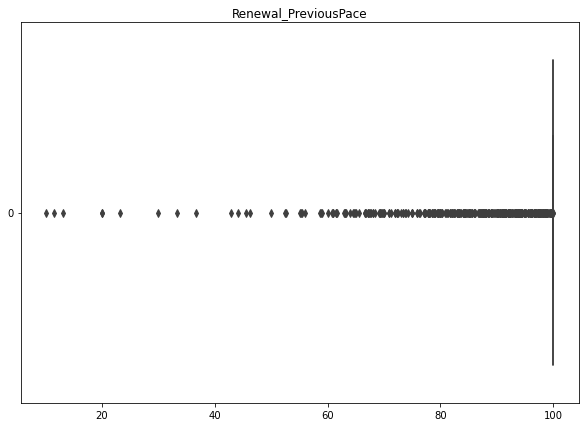

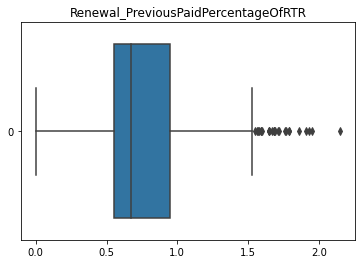

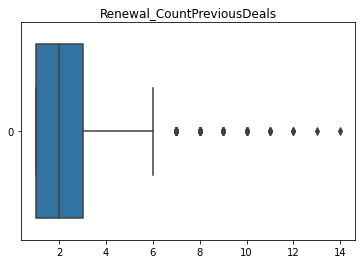

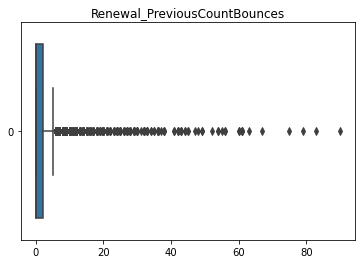

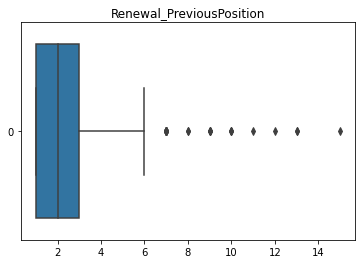

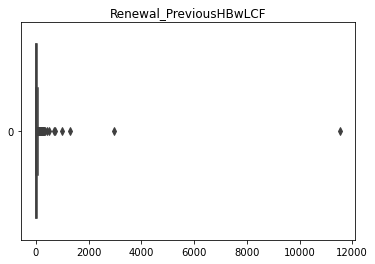

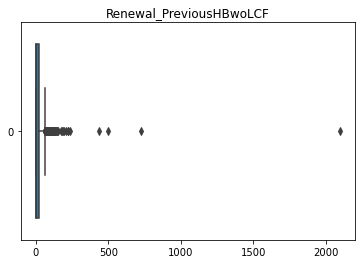

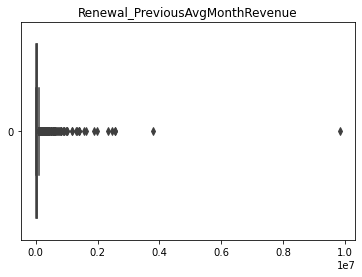

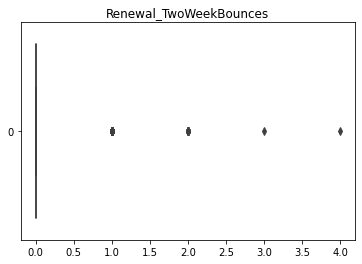

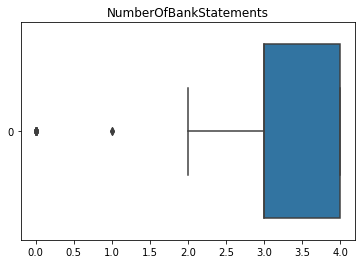

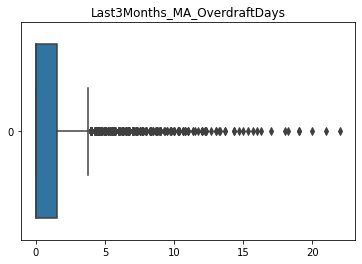

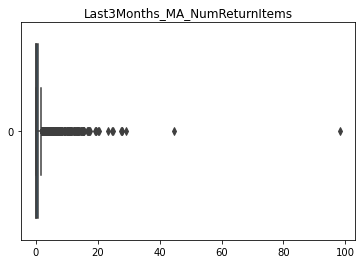

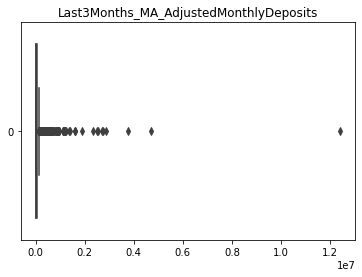

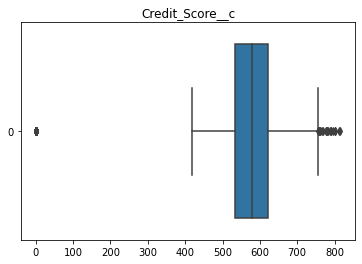

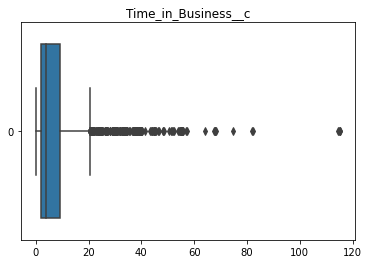

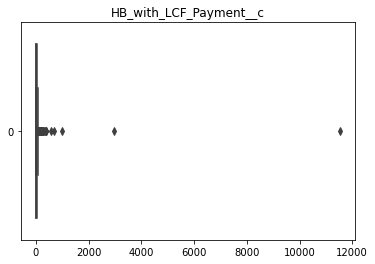

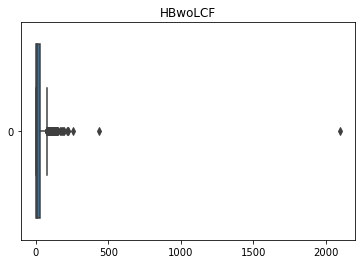

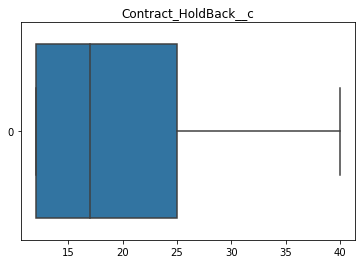

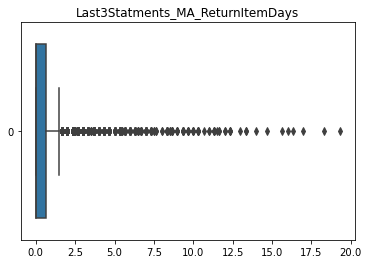

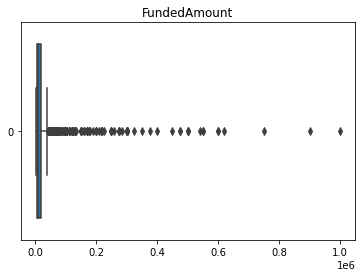

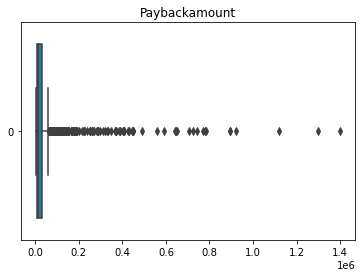

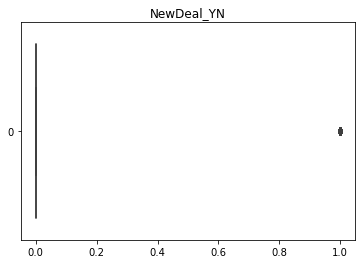

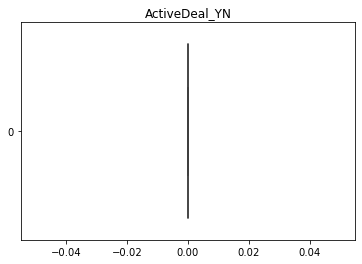

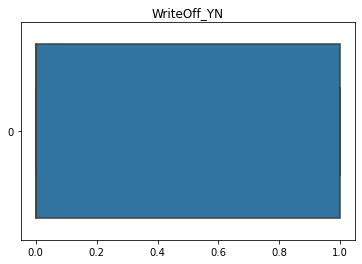

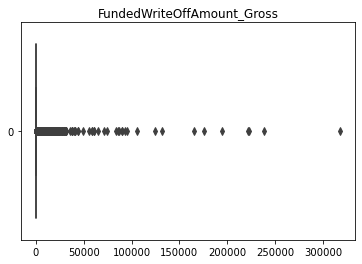

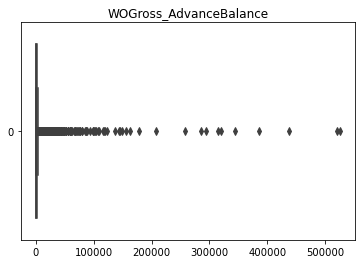

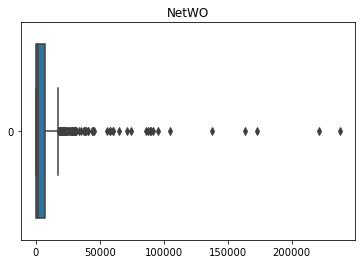

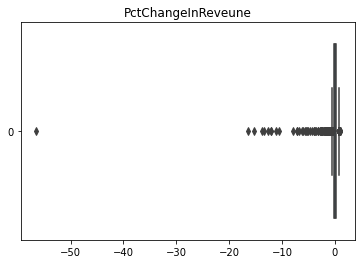

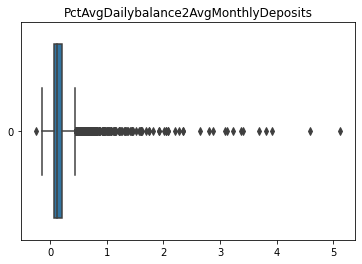

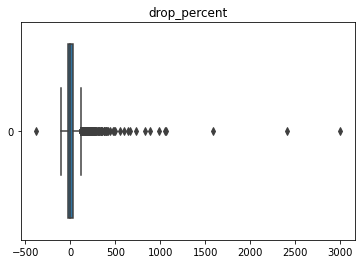

In [41]:
# Box plot check
f,ax=plt.subplots(figsize=(10,7))
for i in col:
    plt.clf() #clearing the figure
    sns.boxplot(data=data[i], orient='h')
    plt.title(i)
    plt.show()

In [42]:
data.columns

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousHBwoLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Last3Months_MA_OverdraftDays',
       'Last3Months_MA_NumReturnItems',
       'Last3Months_MA_AdjustedMonthlyDeposits', 'Credit_Score__c',
       'Time_in_Business__c', 'HB_with_LCF_Payment__c', 'HBwoLCF',
       'Contract_HoldBack__c', 'Last3Statments_MA_ReturnItemDays',
       'FundedAmount', 'Paybackamount', 'NewDeal_YN', 'ActiveDeal_YN',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'NetWO', 'Industry', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits', 'drop_percent',
       'OpportunityID', 'Is_this_Business_home_based__c_Yes',
       'Industry_Group_Construction',

In [43]:
var_with_out=[
              'Renewal_PreviousHBwoLCF',
              'Renewal_PreviousAvgMonthRevenue',
              'Last3Months_MA_NumReturnItems',
              'Last3Months_MA_AdjustedMonthlyDeposits',
              'HBwoLCF'
             ]

data[var_with_out].describe()

,Renewal_PreviousHBwoLCF,Renewal_PreviousAvgMonthRevenue,Last3Months_MA_NumReturnItems,Last3Months_MA_AdjustedMonthlyDeposits,HBwoLCF
count,1992.000000,3.246000e+03,3367.000000,3.367000e+03,1520.000000
mean,18.022631,6.609887e+04,1.078581,7.556806e+04,21.564941
std,57.235458,2.369385e+05,3.217658,2.899035e+05,61.735988
min,0.000000,1.959940e+03,0.000000,1.220150e+02,0.000000
25%,0.000000,1.523836e+04,0.000000,1.681141e+04,0.000000
50%,4.000000,2.578905e+04,0.000000,2.889450e+04,10.000000
75%,25.000000,5.316486e+04,0.750000,5.848090e+04,30.000000
max,2098.000000,9.840592e+06,98.333333,1.241704e+07,2098.000000


In [44]:
# for i in var_with_out:
#     q20 = data.loc[:,i].quantile(.20)
#     q80 = data.loc[:,i].quantile(.80)
#     ipr = q80 - q20
#     minn = q20 - (ipr*1.5)
#     maxx = q80 + (ipr*1.5)
#     print(i,minn,maxx,q20,q80,ipr)
    
    
#     data.loc[data.loc[:,i]<minn,i]=q20#data.loc[:,i].median()
#     data.loc[data.loc[:,i]>maxx,i]=q80#data.loc[:,i].median()

In [45]:
for i in var_with_out:
    q25 = data.loc[:,i].quantile(.25)
    q75 = data.loc[:,i].quantile(.75)
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
    print(i,minn,maxx,q25,q75,iqr)
    
    
    data.loc[data.loc[:,i]<minn,i]=q25#data.loc[:,i].median()
    data.loc[data.loc[:,i]>maxx,i]=q75#data.loc[:,i].median()

Renewal_PreviousHBwoLCF -37.5 62.5 0.0 25.0 25.0
Renewal_PreviousAvgMonthRevenue -41651.37750000001 110054.60250000001 15238.365 53164.86 37926.495
Last3Months_MA_NumReturnItems -1.125 1.875 0.0 0.75 0.75
Last3Months_MA_AdjustedMonthlyDeposits -45692.8237495 120985.13958249999 16811.4125 58480.903332999995 41669.490832999996
HBwoLCF -45.0 75.0 0.0 30.0 30.0


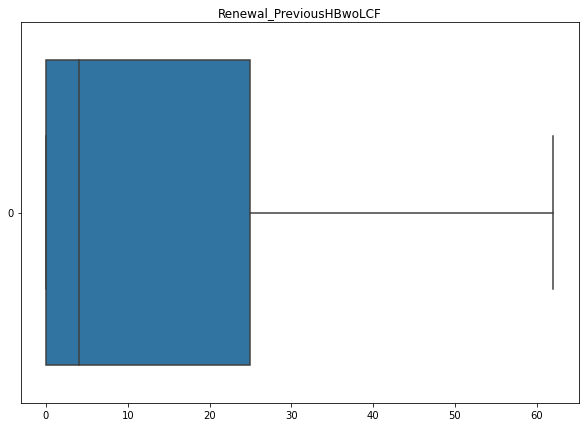

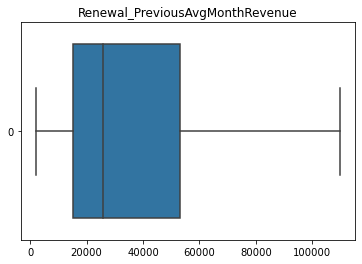

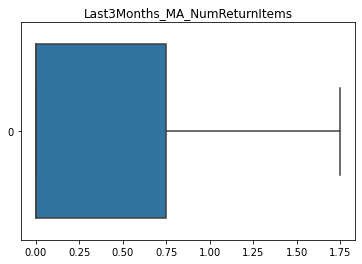

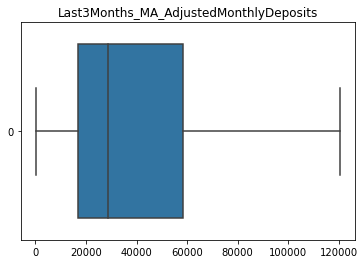

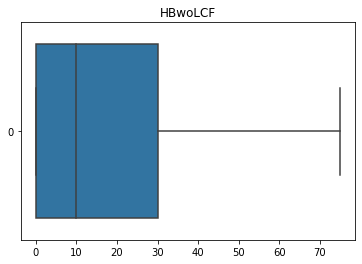

In [46]:
# Box plot check
f,ax=plt.subplots(figsize=(10,7))
for i in var_with_out:
    plt.clf() #clearing the figure
    sns.boxplot(data=data[i], orient='h')
    plt.title(i)
    plt.show()

## Missing Values

In [47]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

NetWO                                               73.006497
HBwoLCF                                             55.109273
Renewal_PreviousHBwoLCF                             41.169522
PctChangeInReveune                                   4.873006
Renewal_PreviousAvgMonthRevenue                      4.134672
Last3Months_MA_NumReturnItems                        0.561134
PctAvgDailybalance2AvgMonthlyDeposits                0.561134
Last3Statments_MA_ReturnItemDays                     0.561134
Last3Months_MA_OverdraftDays                         0.561134
Last3Months_MA_AdjustedMonthlyDeposits               0.561134
drop_percent                                         0.443001
Credit_Score__c                                      0.443001
Renewal_PreviousPace                                 0.413467
Renewal_PreviousPaidPercentageOfRTR                  0.413467
OpportunityID                                        0.000000
Industry                                             0.000000
CreatedD

In [48]:
# Dropping attributes based on missing values and client discussions
data.drop(columns = ['HBwoLCF',
                    'Renewal_PreviousHBwoLCF',
                    'NewDeal_YN',
                    'Contract_HoldBack__c'],axis = 'columns',inplace = True)

In [49]:
data.isnull().sum().sort_values(ascending = True)/len(data)*100

CreatedDate                                          0.000000
Industry_Group_Transportation & Public Utilities     0.000000
Industry_Group_Services                              0.000000
Industry_Group_Retail                                0.000000
Industry_Group_Finance, Insurance, Real Estate       0.000000
Industry_Group_Construction                          0.000000
Is_this_Business_home_based__c_Yes                   0.000000
OpportunityID                                        0.000000
Industry                                             0.000000
WOGross_AdvanceBalance                               0.000000
FundedWriteOffAmount_Gross                           0.000000
WriteOff_YN                                          0.000000
ActiveDeal_YN                                        0.000000
Paybackamount                                        0.000000
Drop_category_Neutral/Null                           0.000000
HB_with_LCF_Payment__c                               0.000000
FundedAm

In [50]:
data['NetWO'].fillna(0,inplace=True)

In [51]:
data.isnull().sum().sort_values(ascending = True)/len(data)*100

CreatedDate                                         0.000000
Industry_Group_Transportation & Public Utilities    0.000000
Industry_Group_Services                             0.000000
Industry_Group_Retail                               0.000000
Industry_Group_Finance, Insurance, Real Estate      0.000000
Industry_Group_Construction                         0.000000
Is_this_Business_home_based__c_Yes                  0.000000
OpportunityID                                       0.000000
Industry                                            0.000000
NetWO                                               0.000000
WOGross_AdvanceBalance                              0.000000
FundedWriteOffAmount_Gross                          0.000000
WriteOff_YN                                         0.000000
ActiveDeal_YN                                       0.000000
Paybackamount                                       0.000000
Drop_category_Neutral/Null                          0.000000
FundedAmount            

In [52]:
print(data['Renewal_PreviousPaidPercentageOfRTR'].median())
print(data['Renewal_PreviousPace'].median())
print(data['drop_percent'].median())
print(data['Credit_Score__c'].median())
print(data['Last3Statments_MA_ReturnItemDays'].median())
print(data['Last3Months_MA_AdjustedMonthlyDeposits'].median())
print(data['Last3Months_MA_OverdraftDays'].median())
print(data['PctAvgDailybalance2AvgMonthlyDeposits'].median())
print(data['Last3Months_MA_NumReturnItems'].median())
print(data['Renewal_PreviousAvgMonthRevenue'].median())
print(data['PctChangeInReveune'].median())

0.67
100.0
-5.474021
578.0
0.0
28894.5
0.0
0.118857767554159
0.0
25789.05
0.072894853243058


In [53]:
data['Renewal_PreviousPaidPercentageOfRTR'].fillna(data['Renewal_PreviousPaidPercentageOfRTR'].median(),inplace = True)
data['Renewal_PreviousPace'].fillna(data['Renewal_PreviousPace'].median(),inplace = True)
data['drop_percent'].fillna(data['drop_percent'].median(),inplace = True)
data['Credit_Score__c'].fillna(data['Credit_Score__c'].median(),inplace = True)
data['Last3Statments_MA_ReturnItemDays'].fillna(data['Last3Statments_MA_ReturnItemDays'].median(),inplace = True)
data['Last3Months_MA_AdjustedMonthlyDeposits'].fillna(data['Last3Months_MA_AdjustedMonthlyDeposits'].median(),inplace = True)
data['Last3Months_MA_OverdraftDays'].fillna(data['Last3Months_MA_OverdraftDays'].median(),inplace = True)
data['PctAvgDailybalance2AvgMonthlyDeposits'].fillna(data['PctAvgDailybalance2AvgMonthlyDeposits'].median(),inplace = True)
data['Last3Months_MA_NumReturnItems'].fillna(data['Last3Months_MA_NumReturnItems'].median(),inplace = True)
data['Renewal_PreviousAvgMonthRevenue'].fillna(data['Renewal_PreviousAvgMonthRevenue'].median(),inplace = True)
data['PctChangeInReveune'].fillna(data['PctChangeInReveune'].median(),inplace = True)

In [54]:
data.isnull().sum().sort_values(ascending = True)/len(data)*100

CreatedDate                                         0.0
WriteOff_YN                                         0.0
FundedWriteOffAmount_Gross                          0.0
WOGross_AdvanceBalance                              0.0
NetWO                                               0.0
Industry                                            0.0
PctChangeInReveune                                  0.0
PctAvgDailybalance2AvgMonthlyDeposits               0.0
drop_percent                                        0.0
OpportunityID                                       0.0
Is_this_Business_home_based__c_Yes                  0.0
Industry_Group_Construction                         0.0
Industry_Group_Finance, Insurance, Real Estate      0.0
Industry_Group_Retail                               0.0
Industry_Group_Services                             0.0
Industry_Group_Transportation & Public Utilities    0.0
ActiveDeal_YN                                       0.0
Paybackamount                                   

In [55]:
data.corr()['WriteOff_YN'].sort_values()

NumberOfBankStatements                             -0.328314
Time_in_Business__c                                -0.107384
Renewal_PreviousPaidPercentageOfRTR                -0.089100
Renewal_CountPreviousDeals                         -0.086562
Industry_Group_Services                            -0.078277
Credit_Score__c                                    -0.062066
PctAvgDailybalance2AvgMonthlyDeposits              -0.039305
Industry_Group_Retail                              -0.033864
HB_with_LCF_Payment__c                             -0.021576
Renewal_PreviousHBwLCF                             -0.015632
Renewal_PreviousPace                               -0.001048
Drop_category_Neutral/Null                         -0.000491
Renewal_PreviousPosition                            0.005054
Last3Months_MA_NumReturnItems                       0.010442
Industry_Group_Finance, Insurance, Real Estate      0.011495
PctChangeInReveune                                  0.012479
Is_this_Business_home_ba

In [56]:
data.drop(columns = ['ActiveDeal_YN'],axis=1,inplace = True)

In [57]:
from sklearn.model_selection import train_test_split


X= data.drop(columns = ['WriteOff_YN'],axis=1)
y= data['WriteOff_YN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2708, 36) (2708,)
(678, 36) (678,)


In [59]:
X_train.columns

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements',
       'Last3Months_MA_OverdraftDays', 'Last3Months_MA_NumReturnItems',
       'Last3Months_MA_AdjustedMonthlyDeposits', 'Credit_Score__c',
       'Time_in_Business__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_ReturnItemDays', 'FundedAmount', 'Paybackamount',
       'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance', 'NetWO',
       'Industry', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits', 'drop_percent',
       'OpportunityID', 'Is_this_Business_home_based__c_Yes',
       'Industry_Group_Construction',
       'Industry_Group_Finance, Insurance, Real Estate',
       'Industry_Group_Retail', 'Industry_Group_Services',
     

In [60]:
cols = [
#        'CreatedDate', 
#        'FundedDate',
#        'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces',
#        'Renewal_PreviousPosition',
#        'Renewal_PreviousHBwLCF', 
       'Renewal_PreviousAvgMonthRevenue',
       'Renewal_TwoWeekBounces', 
#         'NumberOfBankStatements',
       'Last3Months_MA_OverdraftDays', 
#         'Last3Months_MA_NumReturnItems',
#        'Last3Months_MA_AdjustedMonthlyDeposits', 
        'Credit_Score__c',
       'Time_in_Business__c', 
#         'HB_with_LCF_Payment__c',
#        'Last3Statments_MA_ReturnItemDays', 
#         'FundedAmount', 
#         'Paybackamount',
#        'FundedWriteOffAmount_Gross', 
#         'WOGross_AdvanceBalance', 
#         'NetWO',
#        'PctChangeInReveune', 
#         'PctAvgDailybalance2AvgMonthlyDeposits',
       'drop_percent', 
#         'OpportunityID', 
#         'Is_this_Business_home_based__c_Yes',
       'Industry_Group_Finance, Insurance, Real Estate',
       'Industry_Group_Construction', 
        'Industry_Group_Retail',
       'Industry_Group_Services',
       'Industry_Group_Transportation & Public Utilities',
       'Drop_category_Neutral/Null', 
        'Drop_category_Positive'
]
len(cols)

16

In [81]:
data.columns

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements',
       'Last3Months_MA_OverdraftDays', 'Last3Months_MA_NumReturnItems',
       'Last3Months_MA_AdjustedMonthlyDeposits', 'Credit_Score__c',
       'Time_in_Business__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_ReturnItemDays', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'NetWO', 'Industry', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits', 'drop_percent',
       'OpportunityID', 'Is_this_Business_home_based__c_Yes',
       'Industry_Group_Construction',
       'Industry_Group_Finance, Insurance, Real Estate',
       'Industry_Group_Retail', 'Industry_Group_S

In [85]:
data[[
       'CreatedDate', 
       'FundedDate',
#        'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces',
#        'Renewal_PreviousPosition',
#        'Renewal_PreviousHBwLCF', 
       'Renewal_PreviousAvgMonthRevenue',
       'Renewal_TwoWeekBounces', 
#         'NumberOfBankStatements',
       'Last3Months_MA_OverdraftDays', 
#         'Last3Months_MA_NumReturnItems',
#        'Last3Months_MA_AdjustedMonthlyDeposits', 
        'Credit_Score__c',
       'Time_in_Business__c', 
#         'HB_with_LCF_Payment__c',
#        'Last3Statments_MA_ReturnItemDays', 
        'FundedAmount', 
        'Paybackamount',
       'FundedWriteOffAmount_Gross', 
        'WOGross_AdvanceBalance', 
        'NetWO',
#        'PctChangeInReveune', 
#         'PctAvgDailybalance2AvgMonthlyDeposits',
       'drop_percent', 
        'OpportunityID', 
#         'Is_this_Business_home_based__c_Yes',
       'Industry_Group_Finance, Insurance, Real Estate',
       'Industry_Group_Construction', 
        'Industry_Group_Retail',
       'Industry_Group_Services',
       'Industry_Group_Transportation & Public Utilities',
       'Drop_category_Neutral/Null', 
        'Drop_category_Positive'
]].to_excel('Final_Renewal_Train_Data.xlsx')

# Modelling

In [61]:
import statsmodels.api as sm

In [62]:
cols = cols

In [63]:
cols

['Renewal_PreviousPaidPercentageOfRTR',
 'Renewal_CountPreviousDeals',
 'Renewal_PreviousCountBounces',
 'Renewal_PreviousAvgMonthRevenue',
 'Renewal_TwoWeekBounces',
 'Last3Months_MA_OverdraftDays',
 'Credit_Score__c',
 'Time_in_Business__c',
 'drop_percent',
 'Industry_Group_Finance, Insurance, Real Estate',
 'Industry_Group_Construction',
 'Industry_Group_Retail',
 'Industry_Group_Services',
 'Industry_Group_Transportation & Public Utilities',
 'Drop_category_Neutral/Null',
 'Drop_category_Positive']

In [64]:
X_train_with_constant = sm.add_constant(X_train[cols])
X_test_with_constant = sm.add_constant(X_test[cols])

In [65]:
# building the model and fitting the data
logit_model= sm.Logit(y_train, X_train_with_constant).fit()

Optimization terminated successfully.
         Current function value: 0.547751
         Iterations 6


In [66]:
# printing the summary table
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WriteOff_YN   No. Observations:                 2708
Model:                          Logit   Df Residuals:                     2691
Method:                           MLE   Df Model:                           16
Date:                Mon, 19 Dec 2022   Pseudo R-squ.:                 0.06078
Time:                        12:02:10   Log-Likelihood:                -1483.3
converged:                       True   LL-Null:                       -1579.3
Covariance Type:            nonrobust   LLR p-value:                 3.278e-32
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.4619      0.276      1.674      0.094      -0.079       1.003
Renewal_PreviousPaidPercentageOfRTR                 -1.0553      0.191     -5.514      0.000      -1.430      -0.680
Renewal_CountPreviousDeals                          -0.1476      0.031     -4.717      0.000      -0.209      -0.086
Renewal_PreviousCountBounces                         0.0153      0.006      2.563      0.010       0.004       0.027
Renewal_PreviousAvgMonthRevenue                   3.528e-06   2.05e-06      1.721      0.085    -4.9e-07    7.55e-06
Renewal_TwoWeekBounces                               0.6182      0.189      3.279      0.001       0.249       0.988
Last3Months_MA_OverdraftDays                         0.0437      0.018      2.403      0.016       0.008       0.079
Credit_Score__c                                     -0.0007      0.000     -2.587      0.010      -0.001      -0.000
Time_in_Business__c                                 -0.0224      0.006     -3.825      0.000      -0.034      -0.011
drop_percent                                         0.0024      0.001      3.659      0.000       0.001       0.004
Industry_Group_Finance, Insurance, Real Estate      -0.0950      0.275     -0.346      0.730      -0.633       0.443
Industry_Group_Construction                          0.0212      0.189      0.113      0.910      -0.349       0.391
Industry_Group_Retail                               -0.5053      0.208     -2.431      0.015      -0.913      -0.098
Industry_Group_Services                             -0.4365      0.165     -2.646      0.008      -0.760      -0.113
Industry_Group_Transportation & Public Utilities    -0.0419      0.178     -0.235      0.814      -0.391       0.307
Drop_category_Neutral/Null                           0.2860      0.615      0.465      0.642      -0.919       1.491
Drop_category_Positive                               0.2716      0.109      2.496      0.013       0.058       0.485
====================================================================================================================
"""

In [67]:
X_train.columns

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements',
       'Last3Months_MA_OverdraftDays', 'Last3Months_MA_NumReturnItems',
       'Last3Months_MA_AdjustedMonthlyDeposits', 'Credit_Score__c',
       'Time_in_Business__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_ReturnItemDays', 'FundedAmount', 'Paybackamount',
       'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance', 'NetWO',
       'Industry', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits', 'drop_percent',
       'OpportunityID', 'Is_this_Business_home_based__c_Yes',
       'Industry_Group_Construction',
       'Industry_Group_Finance, Insurance, Real Estate',
       'Industry_Group_Retail', 'Industry_Group_Services',
     

In [68]:
# Logit train data prediction 
logit_pred_train=pd.DataFrame(logit_model.predict(X_train_with_constant),columns=["pred_1"])
logit_pred_train=pd.concat([X_train_with_constant,X_train[['WOGross_AdvanceBalance', 'FundedAmount',
       'FundedWriteOffAmount_Gross','Paybackamount']],y_train,logit_pred_train],axis=1)
logit_pred_train["y_pred"]=list(map(round,logit_model.predict(X_train_with_constant)))

In [69]:
#Logit val data prediction
logit_pred_test=pd.DataFrame(logit_model.predict(X_test_with_constant),columns=["pred_1"])
logit_pred_test=pd.concat([X_test_with_constant,X_test[['WOGross_AdvanceBalance', 'FundedAmount',
       'FundedWriteOffAmount_Gross','Paybackamount']],y_test,logit_pred_test],axis=1)
logit_pred_test["y_pred"]=list(map(round,logit_model.predict(X_test_with_constant)))

# KS Decile Chart

In [70]:
# logit_pred_train

In [71]:
# ind = pd.read_excel('renewal.xlsx')

In [72]:
# ind['Industry_Group']=np.where( 
#             (ind['Industry']=="Manufacturing") | (ind['Industry']=="Agriculture, Forestry, Fishing")
#             | (ind['Industry']=="Wholesale") | (ind['Industry']=="Wholesale Trade") |
#             (ind['Industry']=="E-Commerce") | (ind['Industry'] == 'Mining'),'All_Other',ind['Industry'])

In [73]:
# pd.merge(logit_pred_train,ind['Industry_Group'],left_index=True,right_index=True)

In [74]:
# pd.merge(logit_pred_train,ind['Industry_Group'],left_index=True,right_index=True).to_excel('Renewal_train_set_analysis_3.xlsx')

In [77]:
#--LOGIT Train data
train_decile = ks(data=logit_pred_train,target="WriteOff_YN", prob="pred_1")
train_decile

,No_of_Opps,min_prob,max_prob,Avg_score,No_of_WOs,%_Unit_WO_Rate,cum_Unit_WO,Funded_$,%_Funded_$,Funded_WO_Gross_$,Gross_$_rate,Cum_Gross_WO_$,WO_Gross_Advance_Balance,PaybackAmount_$,Gross_Advance_Rate
Decile,,,,,,,,,,,,,,,
1,271,2.09,13.56,7.82,36.0,13.28,4.92,6619620.00,11.04,368600.00,5.57,5.74,917806.30,9765353.80,9.40
2,271,13.58,17.18,15.38,32.0,11.81,9.29,6557750.00,10.93,312611.56,4.77,10.61,712540.16,9501457.50,7.50
3,271,17.19,20.02,18.60,34.0,12.55,13.94,5319300.00,8.87,173172.86,3.26,13.31,464245.35,7880487.00,5.89
4,271,20.03,22.64,21.34,63.0,23.25,22.55,4669562.00,7.79,467725.89,10.02,20.60,999253.56,6942557.38,14.39
5,270,22.64,25.43,24.04,68.0,25.19,31.88,5387300.00,8.98,333468.11,6.19,25.80,821820.88,7894527.00,10.41
6,271,25.45,28.22,26.84,77.0,28.41,42.40,6102250.00,10.18,396070.36,6.49,31.97,936497.11,8990972.50,10.42
7,271,28.22,31.44,29.83,89.0,32.84,54.56,5323921.00,8.88,1161860.27,21.82,50.07,2259201.66,7886522.29,28.65
8,271,31.44,35.81,33.62,94.0,34.69,67.41,6296700.00,10.50,829194.28,13.17,62.99,1849171.46,9235503.00,20.02
9,271,35.83,42.47,39.15,104.0,38.38,81.62,6275667.79,10.46,628509.86,10.02,72.79,1414901.13,9194790.01,15.39


In [78]:
train_decile = train_decile[['No_of_Opps','No_of_WOs','%_Unit_WO_Rate','min_prob', 'max_prob', 'Avg_score', 
        'cum_Unit_WO', 'Funded_$', '%_Funded_$',
       'Funded_WO_Gross_$', 'Gross_$_rate', 'Cum_Gross_WO_$',
       'WO_Gross_Advance_Balance', 'PaybackAmount_$', 'Gross_Advance_Rate']]
train_decile

,No_of_Opps,No_of_WOs,%_Unit_WO_Rate,min_prob,max_prob,Avg_score,cum_Unit_WO,Funded_$,%_Funded_$,Funded_WO_Gross_$,Gross_$_rate,Cum_Gross_WO_$,WO_Gross_Advance_Balance,PaybackAmount_$,Gross_Advance_Rate
Decile,,,,,,,,,,,,,,,
1,271,36.0,13.28,2.09,13.56,7.82,4.92,6619620.00,11.04,368600.00,5.57,5.74,917806.30,9765353.80,9.40
2,271,32.0,11.81,13.58,17.18,15.38,9.29,6557750.00,10.93,312611.56,4.77,10.61,712540.16,9501457.50,7.50
3,271,34.0,12.55,17.19,20.02,18.60,13.94,5319300.00,8.87,173172.86,3.26,13.31,464245.35,7880487.00,5.89
4,271,63.0,23.25,20.03,22.64,21.34,22.55,4669562.00,7.79,467725.89,10.02,20.60,999253.56,6942557.38,14.39
5,270,68.0,25.19,22.64,25.43,24.04,31.88,5387300.00,8.98,333468.11,6.19,25.80,821820.88,7894527.00,10.41
6,271,77.0,28.41,25.45,28.22,26.84,42.40,6102250.00,10.18,396070.36,6.49,31.97,936497.11,8990972.50,10.42
7,271,89.0,32.84,28.22,31.44,29.83,54.56,5323921.00,8.88,1161860.27,21.82,50.07,2259201.66,7886522.29,28.65
8,271,94.0,34.69,31.44,35.81,33.62,67.41,6296700.00,10.50,829194.28,13.17,62.99,1849171.46,9235503.00,20.02
9,271,104.0,38.38,35.83,42.47,39.15,81.62,6275667.79,10.46,628509.86,10.02,72.79,1414901.13,9194790.01,15.39


In [1806]:
# train_decile.to_excel('train_decile.xlsx')

In [1747]:
# train_pentile = ksp(data=logit_pred_train,target="WriteOff_YN", prob="pred_1")
# train_pentile

In [1907]:
import dataframe_image as dfi
dfi.export(train_decile,'train.png')

In [1749]:
# min_range = list(train_decile['min_prob'])
# print(min_range)
# max_range = list(train_decile['max_prob'])
# print(max_range)

In [1750]:
# def decile_val(df_prob,min_range,max_range):
#     if df_prob >= min_range[9]:
#         d=10

#     elif df_prob >= min_range[8]:
#         d=9

#     elif df_prob >= min_range[7]:
#         d=8

#     elif df_prob >= min_range[6]:
#         d=7

#     elif df_prob >= min_range[5]:
#         d=6

#     elif df_prob >= min_range[4]:
#         d=5

#     elif df_prob >= min_range[3]:
#         d=4

#     elif df_prob >= min_range[2]:
#         d=3

#     elif df_prob >= min_range[1]:
#         d=2

#     else:
#         d = 1
#     return d


In [1751]:
# def decile_val(df_prob,min_range,max_range):
#     if df_prob >= min_range[9]:
#         d=10

#     elif df_prob >= min_range[8] and df_prob <= max_range[8]:
#         d=9

#     elif df_prob >= min_range[7] and df_prob <= max_range[7]:
#         d=8

#     elif df_prob >= min_range[6] and df_prob <= max_range[6]:
#         d=7

#     elif df_prob >= min_range[5] and df_prob <= max_range[5]:
#         d=6

#     elif df_prob >= min_range[4] and df_prob <= max_range[4]:
#         d=5

#     elif df_prob >= min_range[3] and df_prob <= max_range[3]:
#         d=4

#     elif df_prob >= min_range[2] and df_prob <= max_range[2]:
#         d=3

#     elif df_prob >= min_range[1] and df_prob <= max_range[1]:
#         d=2

#     else:
#         d = 1
#     return d


In [1752]:
# logit_pred_val['decile'] = logit_pred_val['pred_1'].apply(decile_val,args = (min_range,max_range))
# logit_pred_val

In [1753]:
# logit_pred_val['Decile'].value_counts()

In [1754]:
# logit_pred_val['Decile'] = logit_pred_val['decile']

In [1755]:
# logit_pred_val['Decile'].value_counts()

In [1756]:
# logit_pred_val.drop('decile',axis = 'columns',inplace = True)

In [1757]:
# 8/(8+10+5+12+15+18+23+26+22+30)

In [1758]:
# ind = pd.read_excel('renewal.xlsx')

In [1759]:
# ind.corr()['WriteOff_YN']['Renewal_PreviousAvgMonthRevenue']

In [1760]:
# ind.corr()['WriteOff_YN']['Credit_Score__c']

In [1761]:
# ind['NumberOfBankStatements'].value_counts()

In [1762]:
# ind['Industry']

In [1763]:
# pd.merge(logit_pred_val,ind['Industry'],left_index=True,right_index=True).to_excel('abc.xlsx')

In [1764]:
# logit_pred_val.columns

In [1765]:
# logit_pred_val.sort_values(by = 'Rank',ascending = False).to_excel('Renewal_test_set_analysis.xlsx')

In [1915]:
# pd.merge(logit_pred_test,ind['Industry_Group'],left_index=True,right_index=True).to_excel('Renewal_test_set_analysis_3.xlsx')

In [79]:
#--LOGIT Test data
test_decile = ks(data=logit_pred_test,target="WriteOff_YN", prob="pred_1")
test_decile

,No_of_Opps,min_prob,max_prob,Avg_score,No_of_WOs,%_Unit_WO_Rate,cum_Unit_WO,Funded_$,%_Funded_$,Funded_WO_Gross_$,Gross_$_rate,Cum_Gross_WO_$,WO_Gross_Advance_Balance,PaybackAmount_$,Gross_Advance_Rate
Decile,,,,,,,,,,,,,,,
1,68,1.99,13.81,7.90,11.0,16.18,5.99,1147600.0,7.53,30687.72,2.67,1.80,249428.51,1708214.00,14.60
2,68,13.84,17.58,15.71,9.0,13.24,10.89,2364325.0,15.51,75302.37,3.18,6.21,162821.76,3448634.25,4.72
3,68,17.68,20.99,19.34,14.0,20.59,18.52,1323840.0,8.69,81438.57,6.15,10.99,190073.34,1943097.60,9.78
4,68,21.00,23.46,22.23,17.0,25.00,27.77,1416975.0,9.30,201525.15,14.22,22.81,371457.15,2090300.75,17.77
5,67,23.48,26.21,24.84,18.0,26.87,37.72,1582500.0,10.38,314434.39,19.87,41.24,537006.81,2340515.00,22.94
6,68,26.22,29.27,27.74,13.0,19.12,44.80,1516450.0,9.95,160579.26,10.59,50.66,452201.96,2237240.50,20.21
7,68,29.28,31.98,30.63,25.0,36.76,58.41,1620721.0,10.63,281951.73,17.40,67.19,571467.84,2393109.29,23.88
8,68,32.01,34.60,33.30,22.0,32.35,70.39,1757157.0,11.53,176305.78,10.03,77.53,366159.19,2597223.93,14.10
9,68,34.70,41.81,38.26,29.0,42.65,86.19,1444500.0,9.48,215179.38,14.90,90.15,522435.71,2126115.00,24.57


In [80]:
test_decile=test_decile[['No_of_Opps','No_of_WOs','%_Unit_WO_Rate','min_prob', 'max_prob', 'Avg_score', 
        'cum_Unit_WO', 'Funded_$', '%_Funded_$',
       'Funded_WO_Gross_$', 'Gross_$_rate', 'Cum_Gross_WO_$',
       'WO_Gross_Advance_Balance', 'PaybackAmount_$', 'Gross_Advance_Rate']]
test_decile

,No_of_Opps,No_of_WOs,%_Unit_WO_Rate,min_prob,max_prob,Avg_score,cum_Unit_WO,Funded_$,%_Funded_$,Funded_WO_Gross_$,Gross_$_rate,Cum_Gross_WO_$,WO_Gross_Advance_Balance,PaybackAmount_$,Gross_Advance_Rate
Decile,,,,,,,,,,,,,,,
1,68,11.0,16.18,1.99,13.81,7.90,5.99,1147600.0,7.53,30687.72,2.67,1.80,249428.51,1708214.00,14.60
2,68,9.0,13.24,13.84,17.58,15.71,10.89,2364325.0,15.51,75302.37,3.18,6.21,162821.76,3448634.25,4.72
3,68,14.0,20.59,17.68,20.99,19.34,18.52,1323840.0,8.69,81438.57,6.15,10.99,190073.34,1943097.60,9.78
4,68,17.0,25.00,21.00,23.46,22.23,27.77,1416975.0,9.30,201525.15,14.22,22.81,371457.15,2090300.75,17.77
5,67,18.0,26.87,23.48,26.21,24.84,37.72,1582500.0,10.38,314434.39,19.87,41.24,537006.81,2340515.00,22.94
6,68,13.0,19.12,26.22,29.27,27.74,44.80,1516450.0,9.95,160579.26,10.59,50.66,452201.96,2237240.50,20.21
7,68,25.0,36.76,29.28,31.98,30.63,58.41,1620721.0,10.63,281951.73,17.40,67.19,571467.84,2393109.29,23.88
8,68,22.0,32.35,32.01,34.60,33.30,70.39,1757157.0,11.53,176305.78,10.03,77.53,366159.19,2597223.93,14.10
9,68,29.0,42.65,34.70,41.81,38.26,86.19,1444500.0,9.48,215179.38,14.90,90.15,522435.71,2126115.00,24.57


In [1282]:
# val_decile[['No_of_Opps','No_of_WOs','%_Unit_WO_Rate','min_prob', 'max_prob', 'Avg_score', 
#         'cum_Unit_WO', 'Funded_$', '%_Funded_$',
#        'Funded_WO_Gross_$', 'Gross_$_rate', 'Cum_Gross_WO_$',
#        'WO_Gross_Advance_Balance', 'PaybackAmount_$', 'Gross_Advance_Rate']].to_excel('test_decile.xlsx')

In [1908]:
dfi.export(test_decile,'test.png')

# Validation data as per client(Test set)

In [86]:
valid_df=val_data.copy()

In [87]:
valid_df.shape

(582, 55)

In [88]:
valid_df['Industry'].value_counts()

Services                             238
Transportation & Public Utilities    170
Retail                                71
Construction                          49
Manufacturing                         18
Finance, Insurance, Real Estate       18
Agriculture, Forestry, Fishing        13
Wholesale                              5
Name: Industry, dtype: int64

In [89]:
# check for %_skewness
print("Percenatge of Non_writeoff_deal: ", round(valid_df['WriteOff_YN'].value_counts()[0]/len(valid_df['WriteOff_YN'])*100), "%")
print("Percenatge of writeoff_deal: ", round(valid_df['WriteOff_YN'].value_counts()[1]/len(valid_df['WriteOff_YN'])*100), "%")

Percenatge of Non_writeoff_deal:  73 %
Percenatge of writeoff_deal:  27 %


In [90]:
valid_df['Industry_Group']=np.where( 
            (valid_df['Industry']=="Manufacturing") | (valid_df['Industry']=="Agriculture, Forestry, Fishing")
            | (valid_df['Industry']=="Wholesale") | (valid_df['Industry']=="Wholesale Trade") |
            (valid_df['Industry']=="E-Commerce") | (valid_df['Industry'] == 'Mining'),'All_Other',valid_df['Industry'])

In [91]:
valid_df['Industry_Group'].value_counts()

Services                             238
Transportation & Public Utilities    170
Retail                                71
Construction                          49
All_Other                             36
Finance, Insurance, Real Estate       18
Name: Industry_Group, dtype: int64

In [92]:
valid_df.drop(['Industry_Group__c'],axis = 1,inplace = True)

In [93]:
valid_df.columns

Index(['CreatedDate', 'FundedDate', 'OpportunityName', 'Priordeal_OppID',
       'Renewal_PreviousCollectionStatus', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Last3Months_MA_OverdraftDays',
       'Last3Months_MA_NumReturnItems', 'Last3Months_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays',
       'Last3Months_MA_AdjustedMonthlyDeposits',
       'Last3Months_MA_AvgDailyBalance', 'Credit_Score__c',
       'Time_in_Business__c', 'Is_this_Business_home_based__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c', 'HBwoLCF',
       'Contract_HoldBack__c', 'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments

In [94]:
valid_df.drop(columns = ['OpportunityName',
                    'Priordeal_OppID',
                    'Renewal_PreviousCollectionStatus'],axis = 'columns',inplace = True)

In [95]:
valid_df = pd.get_dummies(valid_df, columns = ['Is_this_Business_home_based__c',
                                       'Industry_Group',
                                        'Drop_category'
                                      ],drop_first=True)
valid_df.head()

,CreatedDate,FundedDate,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,...,Is_this_Business_home_based__c_Yes,Industry_Group_Construction,"Industry_Group_Finance, Insurance, Real Estate",Industry_Group_Retail,Industry_Group_Services,Industry_Group_Transportation & Public Utilities,Drop_category_Positive
7,2022-06-27 19:07:10,2022-06-28,45.65,0.46,552.0,1.0,13.0,...,1,0,0,0,0,1,1
9,2022-02-28 21:21:53,2022-03-17,100.00,1.00,640.0,1.0,1.0,...,1,0,0,0,1,0,0
12,2022-05-26 17:02:00,2022-06-02,100.00,1.18,633.0,2.0,6.0,...,1,0,0,0,0,1,1
18,2022-05-02 15:23:20,2022-05-03,77.93,0.78,563.0,7.0,65.0,...,1,1,0,0,0,0,0
41,2022-03-30 16:56:38,2022-03-31,100.00,1.00,593.0,1.0,0.0,...,0,0,0,1,0,0,0


In [96]:
# After one hot encoding, this column was missing in the validation dataset
valid_df['Drop_category_Neutral/Null'] = 0

In [97]:
valid_df.shape

(582, 57)

In [98]:
# These cols were dropped in the train set on the basis of correlation
# Dropping mutually correlated attributes
valid_df.drop(columns = ['AdjustedMonthlyDeposits',
  'Avg_ReturnItemdays',
  'BBC_Position__c',
  'Renewal_PreviousCreditScore',
  'Last3Months_MA_AvgDailyBalance',
  'Last3Months_Sum_NumReturnItems',
  'Last3Statments_MA_AdjustedMonthlyDeposits',
  'Last3Statments_MA_AvgDailyBalance',
  'Last3Statments_MA_NumReturnItems',
  'Last3Statments_MA_OverdraftDays',
  'Last3Statments_Sum_NumReturnItems',
  'LastBankStatement_OverdraftDays',
  'LatestMonth_ReturnItemDays',
#   'NetWO',
#   'Paybackamount',
  'Renewal_PreviousAvgDailyBalance',
  'TwoMonthAvg_AdjustedMonthlyDeposits',
#   'WOGross_AdvanceBalance'
                    ],axis = 'columns',inplace = True)

In [99]:
valid_df.shape

(582, 42)

In [100]:
# Renewal_PreviousHBwoLCF -37.5 62.5 0.0 25.0 25.0
# Renewal_PreviousAvgMonthRevenue -41651.37750000001 110054.60250000001 15238.365 53164.86 37926.495
# Last3Months_MA_NumReturnItems -1.125 1.875 0.0 0.75 0.75
# Last3Months_MA_AdjustedMonthlyDeposits -45692.8237495 120985.13958249999 16811.4125 58480.903332999995 41669.490832999996
# HBwoLCF -45.0 75.0 0.0 30.0 30.0

In [101]:
valid_df.loc[valid_df.loc[:,'Renewal_PreviousHBwoLCF']< -37.5,'Renewal_PreviousHBwoLCF']=0
valid_df.loc[valid_df.loc[:,'Renewal_PreviousHBwoLCF']>62.5,'Renewal_PreviousHBwoLCF']=25.0

valid_df.loc[valid_df.loc[:,'Renewal_PreviousAvgMonthRevenue']< -41651.37750000001,'Renewal_PreviousAvgMonthRevenue']=15238.365
valid_df.loc[valid_df.loc[:,'Renewal_PreviousAvgMonthRevenue']>110054.60250000001,'Renewal_PreviousAvgMonthRevenue']=53164.86

valid_df.loc[valid_df.loc[:,'Last3Months_MA_NumReturnItems']< -1.125,'Last3Months_MA_NumReturnItems']=0
valid_df.loc[valid_df.loc[:,'Last3Months_MA_NumReturnItems']>1.875,'Last3Months_MA_NumReturnItems']=0.75

valid_df.loc[valid_df.loc[:,'Last3Months_MA_AdjustedMonthlyDeposits']< -45692.8237495,'Last3Months_MA_AdjustedMonthlyDeposits']=16811.4125
valid_df.loc[valid_df.loc[:,'Last3Months_MA_AdjustedMonthlyDeposits']>120985.13958249999,'Last3Months_MA_AdjustedMonthlyDeposits']=58480.903332999995

valid_df.loc[valid_df.loc[:,'HBwoLCF']< -45.0,'HBwoLCF']=0
valid_df.loc[valid_df.loc[:,'HBwoLCF']>75.0,'HBwoLCF']=30.0

In [102]:
# Dropping attributes based on missing values and client discussions as per training set
valid_df.drop(columns = ['HBwoLCF',
                    'Renewal_PreviousHBwoLCF',
                    'NewDeal_YN',
                    'Contract_HoldBack__c'],axis = 'columns',inplace = True)

In [103]:
valid_df.isnull().sum().sort_values(ascending = True)/len(valid_df)*100

CreatedDate                                          0.000000
ActiveDeal_YN                                        0.000000
WriteOff_YN                                          0.000000
FundedWriteOffAmount_Gross                           0.000000
WOGross_AdvanceBalance                               0.000000
Industry                                             0.000000
PctAvgDailybalance2AvgMonthlyDeposits                0.000000
Paybackamount                                        0.000000
drop_percent                                         0.000000
Is_this_Business_home_based__c_Yes                   0.000000
Industry_Group_Construction                          0.000000
Industry_Group_Finance, Insurance, Real Estate       0.000000
Industry_Group_Retail                                0.000000
Industry_Group_Services                              0.000000
Industry_Group_Transportation & Public Utilities     0.000000
OpportunityID                                        0.000000
Drop_cat

In [104]:
valid_df['NetWO'].fillna(0,inplace = True)

In [105]:
valid_df.isnull().sum().sort_values(ascending = True)/len(valid_df)*100

CreatedDate                                         0.000000
ActiveDeal_YN                                       0.000000
WriteOff_YN                                         0.000000
FundedWriteOffAmount_Gross                          0.000000
WOGross_AdvanceBalance                              0.000000
NetWO                                               0.000000
Industry                                            0.000000
PctAvgDailybalance2AvgMonthlyDeposits               0.000000
drop_percent                                        0.000000
OpportunityID                                       0.000000
Is_this_Business_home_based__c_Yes                  0.000000
Industry_Group_Construction                         0.000000
Industry_Group_Finance, Insurance, Real Estate      0.000000
Industry_Group_Retail                               0.000000
Industry_Group_Services                             0.000000
Industry_Group_Transportation & Public Utilities    0.000000
Paybackamount           

In [106]:
# 0.67
# 100.0
# -5.474021
# 578.0
# 0.0
# 28894.5
# 0.0
# 0.118857767554159
# 0.0
# 25789.05
# 0.072894853243058
valid_df['Renewal_PreviousPaidPercentageOfRTR'].fillna(0.67,inplace = True)
valid_df['Renewal_PreviousPace'].fillna(100.0,inplace = True)
valid_df['drop_percent'].fillna(-5.474021,inplace = True)
valid_df['Credit_Score__c'].fillna(578.0,inplace = True)
valid_df['Last3Statments_MA_ReturnItemDays'].fillna(0.0,inplace = True)
valid_df['Last3Months_MA_AdjustedMonthlyDeposits'].fillna(28894.5,inplace = True)
valid_df['Last3Months_MA_OverdraftDays'].fillna(0.0,inplace = True)
valid_df['PctAvgDailybalance2AvgMonthlyDeposits'].fillna(0.118857767554159,inplace = True)
valid_df['Last3Months_MA_NumReturnItems'].fillna(0.0,inplace = True)
valid_df['Renewal_PreviousAvgMonthRevenue'].fillna(25789.05,inplace = True)
valid_df['PctChangeInReveune'].fillna(0.072894853243058,inplace = True)

In [107]:
valid_df.isnull().sum().sort_values(ascending = True)/len(valid_df)*100

CreatedDate                                         0.0
WriteOff_YN                                         0.0
FundedWriteOffAmount_Gross                          0.0
WOGross_AdvanceBalance                              0.0
NetWO                                               0.0
Industry                                            0.0
PctChangeInReveune                                  0.0
PctAvgDailybalance2AvgMonthlyDeposits               0.0
drop_percent                                        0.0
OpportunityID                                       0.0
Is_this_Business_home_based__c_Yes                  0.0
Industry_Group_Construction                         0.0
Industry_Group_Finance, Insurance, Real Estate      0.0
Industry_Group_Retail                               0.0
Industry_Group_Services                             0.0
Industry_Group_Transportation & Public Utilities    0.0
ActiveDeal_YN                                       0.0
Paybackamount                                   

In [108]:
valid_df.drop(columns = ['ActiveDeal_YN'],axis=1,inplace = True)

In [109]:
X_valid=valid_df.drop('WriteOff_YN',axis=1)
y_valid=valid_df['WriteOff_YN']

In [110]:
print(X_valid.shape,y_valid.shape)

(582, 36) (582,)


In [111]:
X_valid_with_constant = sm.add_constant(X_valid[cols])

In [112]:
X_valid_with_constant.head()

,const,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousAvgMonthRevenue,Renewal_TwoWeekBounces,Last3Months_MA_OverdraftDays,...,"Industry_Group_Finance, Insurance, Real Estate",Industry_Group_Construction,Industry_Group_Retail,Industry_Group_Services,Industry_Group_Transportation & Public Utilities,Drop_category_Neutral/Null,Drop_category_Positive
7,1.0,0.46,1.0,13.0,22835.47,0.0,0.25,...,0,0,0,0,1,0,1
9,1.0,1.00,1.0,1.0,96486.37,0.0,0.00,...,0,0,0,1,0,0,0
12,1.0,1.18,2.0,6.0,45475.20,0.0,0.00,...,0,0,0,0,1,0,1
18,1.0,0.78,7.0,65.0,53164.86,0.0,0.00,...,0,1,0,0,0,0,0
41,1.0,1.00,1.0,0.0,6844.24,0.0,0.00,...,0,0,1,0,0,0,0


In [113]:
#Logit valid data prediction
logit_pred_valid=pd.DataFrame(logit_model.predict(X_valid_with_constant),columns=["pred_1"])
logit_pred_valid=pd.concat([X_valid_with_constant,X_valid[['WOGross_AdvanceBalance', 'FundedAmount',
       'FundedWriteOffAmount_Gross','Paybackamount']],y_valid,logit_pred_valid],axis=1)
logit_pred_valid["y_pred"]=list(map(round,logit_model.predict(X_valid_with_constant)))

In [114]:
# pd.merge(logit_pred_valid,ind['Industry'],left_index=True,right_index=True).to_excel('Renewal_validation_set_analysis.xlsx')

In [115]:
#--LOGIT Valid data
validation_decile = ks(data=logit_pred_valid,target="WriteOff_YN", prob="pred_1")
validation_decile

,No_of_Opps,min_prob,max_prob,Avg_score,No_of_WOs,%_Unit_WO_Rate,cum_Unit_WO,Funded_$,%_Funded_$,Funded_WO_Gross_$,Gross_$_rate,Cum_Gross_WO_$,WO_Gross_Advance_Balance,PaybackAmount_$,Gross_Advance_Rate
Decile,,,,,,,,,,,,,,,
1,59,3.11,14.35,8.73,11.0,18.64,6.90,1211500.0,10.90,77355.68,6.39,5.25,149992.68,1789335.00,8.38
2,58,14.47,18.10,16.28,3.0,5.17,8.82,1980287.0,17.81,78402.02,3.96,10.58,129192.02,2819554.55,4.58
3,58,18.10,20.94,19.52,8.0,13.79,13.93,1404000.0,12.63,234093.56,16.67,26.48,358644.64,2044310.00,17.54
4,58,20.98,23.56,22.27,18.0,31.03,25.42,871500.0,7.84,106981.47,12.28,33.74,190196.47,1296105.00,14.67
5,58,23.57,26.41,24.99,14.0,24.14,34.37,1041500.0,9.37,143013.75,13.73,43.45,286514.35,1549275.00,18.49
6,59,26.47,29.21,27.84,14.0,23.73,43.16,1042984.0,9.38,105499.37,10.12,50.62,256484.37,1545856.16,16.59
7,58,29.24,32.25,30.74,24.0,41.38,58.48,904700.0,8.14,164338.37,18.16,61.78,300583.01,1339943.00,22.43
8,58,32.29,37.14,34.72,19.0,32.76,70.62,728815.0,6.56,205972.48,28.26,75.77,350735.67,1076314.35,32.59
9,58,37.22,43.54,40.38,18.0,31.03,82.12,1272600.0,11.45,144384.11,11.35,85.57,270671.46,1821554.00,14.86


In [116]:
validation_decile = validation_decile[['No_of_Opps','No_of_WOs','%_Unit_WO_Rate','min_prob', 'max_prob', 'Avg_score', 
        'cum_Unit_WO', 'Funded_$', '%_Funded_$',
       'Funded_WO_Gross_$', 'Gross_$_rate', 'Cum_Gross_WO_$',
       'WO_Gross_Advance_Balance', 'PaybackAmount_$', 'Gross_Advance_Rate']]
validation_decile

,No_of_Opps,No_of_WOs,%_Unit_WO_Rate,min_prob,max_prob,Avg_score,cum_Unit_WO,Funded_$,%_Funded_$,Funded_WO_Gross_$,Gross_$_rate,Cum_Gross_WO_$,WO_Gross_Advance_Balance,PaybackAmount_$,Gross_Advance_Rate
Decile,,,,,,,,,,,,,,,
1,59,11.0,18.64,3.11,14.35,8.73,6.90,1211500.0,10.90,77355.68,6.39,5.25,149992.68,1789335.00,8.38
2,58,3.0,5.17,14.47,18.10,16.28,8.82,1980287.0,17.81,78402.02,3.96,10.58,129192.02,2819554.55,4.58
3,58,8.0,13.79,18.10,20.94,19.52,13.93,1404000.0,12.63,234093.56,16.67,26.48,358644.64,2044310.00,17.54
4,58,18.0,31.03,20.98,23.56,22.27,25.42,871500.0,7.84,106981.47,12.28,33.74,190196.47,1296105.00,14.67
5,58,14.0,24.14,23.57,26.41,24.99,34.37,1041500.0,9.37,143013.75,13.73,43.45,286514.35,1549275.00,18.49
6,59,14.0,23.73,26.47,29.21,27.84,43.16,1042984.0,9.38,105499.37,10.12,50.62,256484.37,1545856.16,16.59
7,58,24.0,41.38,29.24,32.25,30.74,58.48,904700.0,8.14,164338.37,18.16,61.78,300583.01,1339943.00,22.43
8,58,19.0,32.76,32.29,37.14,34.72,70.62,728815.0,6.56,205972.48,28.26,75.77,350735.67,1076314.35,32.59
9,58,18.0,31.03,37.22,43.54,40.38,82.12,1272600.0,11.45,144384.11,11.35,85.57,270671.46,1821554.00,14.86


In [117]:
# pd.merge(logit_pred_valid,ind['Industry_Group'],left_index=True,right_index=True).to_excel('Renewal_val_set_analysis_3.xlsx')

In [118]:
# validation_decile[['No_of_Opps','No_of_WOs','%_Unit_WO_Rate','min_prob', 'max_prob', 'Avg_score', 
#         'cum_Unit_WO', 'Funded_$', '%_Funded_$',
#        'Funded_WO_Gross_$', 'Gross_$_rate', 'Cum_Gross_WO_$',
#        'WO_Gross_Advance_Balance', 'PaybackAmount_$', 'Gross_Advance_Rate']].to_excel('validation_decile.xlsx')

In [1909]:
dfi.export(validation_decile,'validation.png')

In [119]:
valid_df[[
       'CreatedDate', 
       'FundedDate',
#        'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces',
#        'Renewal_PreviousPosition',
#        'Renewal_PreviousHBwLCF', 
       'Renewal_PreviousAvgMonthRevenue',
       'Renewal_TwoWeekBounces', 
#         'NumberOfBankStatements',
       'Last3Months_MA_OverdraftDays', 
#         'Last3Months_MA_NumReturnItems',
#        'Last3Months_MA_AdjustedMonthlyDeposits', 
        'Credit_Score__c',
       'Time_in_Business__c', 
#         'HB_with_LCF_Payment__c',
#        'Last3Statments_MA_ReturnItemDays', 
        'FundedAmount', 
        'Paybackamount',
       'FundedWriteOffAmount_Gross', 
        'WOGross_AdvanceBalance', 
        'NetWO',
#        'PctChangeInReveune', 
#         'PctAvgDailybalance2AvgMonthlyDeposits',
       'drop_percent', 
        'OpportunityID', 
#         'Is_this_Business_home_based__c_Yes',
       'Industry_Group_Finance, Insurance, Real Estate',
       'Industry_Group_Construction', 
        'Industry_Group_Retail',
       'Industry_Group_Services',
       'Industry_Group_Transportation & Public Utilities',
       'Drop_category_Neutral/Null', 
        'Drop_category_Positive'
]].to_excel('Final_Renewal_Validation_Data.xlsx')